<a href="https://colab.research.google.com/github/aliakbarbadri/nlp-tf/blob/master/week4/week4-examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Lesson 2 (I Skipped Lesson 1, it's same)

In [2]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/aliakbarbadri/nlp-tf/master/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt
    

--2020-05-20 13:53:25--  https://raw.githubusercontent.com/aliakbarbadri/nlp-tf/master/irish-lyrics-eof.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69002 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.38K  --.-KB/s    in 0.01s   

2020-05-20 13:53:25 (5.70 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [69002/69002]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
input_sequences[:13]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218]]

In [5]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences[:13])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51   12]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12   96]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96 1217]
 [   0    0    0    0    0    0    0    0    0    0    0   51   12   96
  1217   48]
 [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
    48    2]
 [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
     2   69]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2   11]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
    11   15]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2   11
    15   31]
 [   0    0    0    0    0    0    0    0    0    0    0    2   11   15
    31  361]
 [   0    0    0    0    0    0    0    0    0    0    2   11   15   31
   361    8]
 [   0    0    0    0    0    0    0    0    0    2   11   15   3

In [6]:
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
print(xs[:13])
print("\n\n")
print(labels[:13])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96]
 [   0    0    0    0    0    0    0    0    0    0    0   51   12   96
  1217]
 [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
    48]
 [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
     2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
    11]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2   11
    15]
 [   0    0    0    0    0    0    0    0    0    0    0    2   11   15
    31]
 [   0    0    0    0    0    0    0    0    0    0    2   11   15   31
   361]
 [   0    0    0    0    0    0    0    0    0    2   11   15   31  361
     8]
 [   0    0    0    0    0    0    0    

In [7]:
# one-hot
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(ys[:13])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())
# print(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)

Epoch 1/20
377/377 [==============================] - 7s 19ms/step - loss: 6.6684 - accuracy: 0.0721
Epoch 2/20
377/377 [==============================] - 7s 19ms/step - loss: 5.7763 - accuracy: 0.1126
Epoch 3/20
377/377 [==============================] - 7s 20ms/step - loss: 4.9427 - accuracy: 0.1636
Epoch 4/20
377/377 [==============================] - 7s 19ms/step - loss: 4.0551 - accuracy: 0.2297
Epoch 5/20
377/377 [==============================] - 7s 19ms/step - loss: 3.2524 - accuracy: 0.3265
Epoch 6/20
377/377 [==============================] - 7s 19ms/step - loss: 2.5975 - accuracy: 0.4248
Epoch 7/20
377/377 [==============================] - 7s 19ms/step - loss: 2.1293 - accuracy: 0.5096
Epoch 8/20
377/377 [==============================] - 7s 19ms/step - loss: 1.7785 - accuracy: 0.5798
Epoch 9/20
377/377 [==============================] - 7s 19ms/step - loss: 1.5150 - accuracy: 0.6380
Epoch 10/20
377/377 [==============================] - 7s 19ms/step - loss: 1.3376 - accura

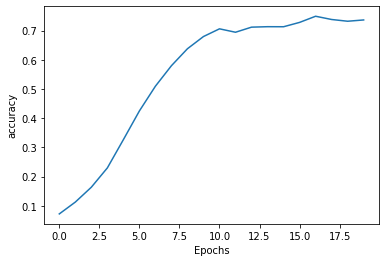

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [12]:
seed_text = "I've got a bad feeling about this"
next_words = 100
token_list = tokenizer.texts_to_sequences([seed_text])[0]

for _ in range(next_words):
  pedded_token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(pedded_token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  token_list.append(int(predicted))
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this moment rose mccann from the best games had your gone and gone and all at me hand and sinking sinking sinking sinking sinking sinking sinking sinking sinking sinking sinking love the sinking sinking sinking sinking sinking sinking sinking sinking sinking sinking love i love i write love love love love love love love love love love gone i love love you love there and gone and gone and gone and i had gone i love my love forever gone by your hat and had gone and more gone i gone love love i bride i love my love and i
